In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
!pip install --upgrade xlrd #colab bug verson xlrd
!pip install geopandas
!pip install pandas fiona shapely pyproj rtree
!pip install contextily
!pip install pygeos
!pip install topojson
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
#!pip install requests py7zr geopandas openpyxl tqdm s3fs PyYAML xlrd
#!pip install git+https://github.com/inseefrlab/cartiflette@80b8a5a28371feb6df31d55bcc2617948a5f9b1a

In [12]:
base_grande = pd.read_csv("effectifs.csv", sep = ";", encoding = 'utf-8', engine = 'python')
base_grande.shape
base_grande = base_grande.dropna()
base_grande = pd.get_dummies(base_grande, prefix = 'indicatrice_', columns=['patho_niv1'], dtype='int')


liste_var = base_grande.columns[17:]
liste_bis = []
for i in liste_var : 
    liste_bis.append(i)
indicatrice_patho_niv1 = liste_bis

inter_def = []
for i in liste_auxil :
    if i in inter_excl : 
        inter_def = inter_def
    else : 
        inter_def.append(i)
classe_age = []
for i in base_grande['cla_age_5'] : 
    if i in inter_def :
        temp = i.split('-')
        temp[0] = int(temp[0])
        temp[1] = int(temp[1])
        age = (temp[1] + temp[0])/2
    elif i == 'tsage' : 
        age = np.nan
    elif i == '95et+' : 
        age = 100
    else : 
        age = np.nan
    classe_age.append(age)
base_grande.loc[:,'classe_age'] = classe_age

,annee,patho_niv2,patho_niv3,top,cla_age_5,sexe,region,dept,ntop,npop,...,indicatrice__Maladies inflammatoires ou rares ou VIH ou SIDA,indicatrice__Maladies neurologiques ou dégénératives,indicatrice__Maladies psychiatriques,indicatrice__Maladies respiratoires chroniques (hors mucoviscidose),indicatrice__Maternité (avec ou sans pathologies),"indicatrice__Pas de pathologies repérées, traitements, maternité, hospitalisations ni traitement antalgique ou anti-inflammatoire",indicatrice__Séjours en hospitalisation complète pour prise en charge de la Covid-19,"indicatrice__Traitement antalgique ou anti-inflammatoire (hors pathologies, traitements, maternité ou hospitalisations)",indicatrice__Traitements du risque vasculaire (hors pathologies),indicatrice__Traitements psychotropes (hors pathologies)
0,2020.0,Traitements hypolipémiants (hors pathologies),Traitements hypolipémiants (hors pathologies),top_FHypoLi_med,80-84,1.0,1,971,290.0,4210.0,...,0,0,0,0,0,0,0,0,1,0
1,2020.0,Traitements hypolipémiants (hors pathologies),Traitements hypolipémiants (hors pathologies),top_FHypoLi_med,80-84,1.0,3,973,40.0,650.0,...,0,0,0,0,0,0,0,0,1,0
2,2020.0,Traitements hypolipémiants (hors pathologies),Traitements hypolipémiants (hors pathologies),top_FHypoLi_med,80-84,1.0,4,999,410.0,5630.0,...,0,0,0,0,0,0,0,0,1,0
3,2020.0,Traitements hypolipémiants (hors pathologies),Traitements hypolipémiants (hors pathologies),top_FHypoLi_med,80-84,1.0,6,999,20.0,350.0,...,0,0,0,0,0,0,0,0,1,0
4,2020.0,Traitements hypolipémiants (hors pathologies),Traitements hypolipémiants (hors pathologies),top_FHypoLi_med,80-84,1.0,11,75,2960.0,20820.0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
base_grande

,annee,patho_niv2,patho_niv3,top,cla_age_5,sexe,region,dept,ntop,npop,...,indicatrice__Maladies du foie ou du pancréas (hors mucoviscidose),indicatrice__Maladies inflammatoires ou rares ou VIH ou SIDA,indicatrice__Maladies neurologiques ou dégénératives,indicatrice__Maladies psychiatriques,indicatrice__Maladies respiratoires chroniques (hors mucoviscidose),indicatrice__Maternité (avec ou sans pathologies),indicatrice__Séjours en hospitalisation complète pour prise en charge de la Covid-19,indicatrice__Traitements du risque vasculaire (hors pathologies),indicatrice__Traitements psychotropes (hors pathologies),classe_age
0,2020.0,Traitements hypolipémiants (hors pathologies),Traitements hypolipémiants (hors pathologies),top_FHypoLi_med,80-84,1.0,1,971,290.0,4210.0,...,0,0,0,0,0,0,0,1,0,82.0
1,2020.0,Traitements hypolipémiants (hors pathologies),Traitements hypolipémiants (hors pathologies),top_FHypoLi_med,80-84,1.0,3,973,40.0,650.0,...,0,0,0,0,0,0,0,1,0,82.0
2,2020.0,Traitements hypolipémiants (hors pathologies),Traitements hypolipémiants (hors pathologies),top_FHypoLi_med,80-84,1.0,4,999,410.0,5630.0,...,0,0,0,0,0,0,0,1,0,82.0
3,2020.0,Traitements hypolipémiants (hors pathologies),Traitements hypolipémiants (hors pathologies),top_FHypoLi_med,80-84,1.0,6,999,20.0,350.0,...,0,0,0,0,0,0,0,1,0,82.0
4,2020.0,Traitements hypolipémiants (hors pathologies),Traitements hypolipémiants (hors pathologies),top_FHypoLi_med,80-84,1.0,11,75,2960.0,20820.0,...,0,0,0,0,0,0,0,1,0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4057196,2021.0,Maladies du foie ou du pancréas (hors mucovisc...,Maladies du foie ou du pancréas (hors mucovisc...,top_HFoiPan_ind,20-24,9.0,76,34,130.0,78510.0,...,1,0,0,0,0,0,0,0,0,22.0
4057197,2021.0,Maladies du foie ou du pancréas (hors mucovisc...,Maladies du foie ou du pancréas (hors mucovisc...,top_HFoiPan_ind,20-24,9.0,76,46,20.0,8020.0,...,1,0,0,0,0,0,0,0,0,22.0
4057198,2021.0,Maladies du foie ou du pancréas (hors mucovisc...,Maladies du foie ou du pancréas (hors mucovisc...,top_HFoiPan_ind,20-24,9.0,76,81,40.0,21540.0,...,1,0,0,0,0,0,0,0,0,22.0
4057199,2021.0,Maladies du foie ou du pancréas (hors mucovisc...,Maladies du foie ou du pancréas (hors mucovisc...,top_HFoiPan_ind,20-24,9.0,76,82,30.0,15020.0,...,1,0,0,0,0,0,0,0,0,22.0


In [13]:
model_foie_alpha = base_grande[['dept', 'classe_age','indicatrice__Maladies du foie ou du pancréas (hors mucoviscidose)','sexe','region']]

In [14]:
model_foie_alpha.columns = model_foie_alpha.columns.str.replace(' ', '_')

In [16]:
model_foie_alpha

,dept,classe_age,indicatrice__Maladies_du_foie_ou_du_pancréas_(hors_mucoviscidose),sexe,region
0,971,82.0,0,1.0,1
1,973,82.0,0,1.0,3
2,999,82.0,0,1.0,4
3,999,82.0,0,1.0,6
4,75,82.0,0,1.0,11
...,...,...,...,...,...
4057196,34,22.0,1,9.0,76
4057197,46,22.0,1,9.0,76
4057198,81,22.0,1,9.0,76
4057199,82,22.0,1,9.0,76


In [15]:
resultats = model_foie_alpha[model_foie_alpha['indicatrice__Maladies_du_foie_ou_du_pancréas_(hors_mucoviscidose)'] == 1].groupby('classe_age').size()
resultats
#exactement le même problème que pour la respiration même nombre 
#fixed

classe_age
2.0       942
7.0       927
12.0     1207
17.0     1930
22.0     2220
27.0     2388
32.0     2469
37.0     2497
42.0     2506
47.0     2508
52.0     2510
57.0     2512
62.0     2506
67.0     2504
72.0     2486
77.0     2478
82.0     2462
87.0     2434
92.0     2372
100.0    1558
dtype: int64

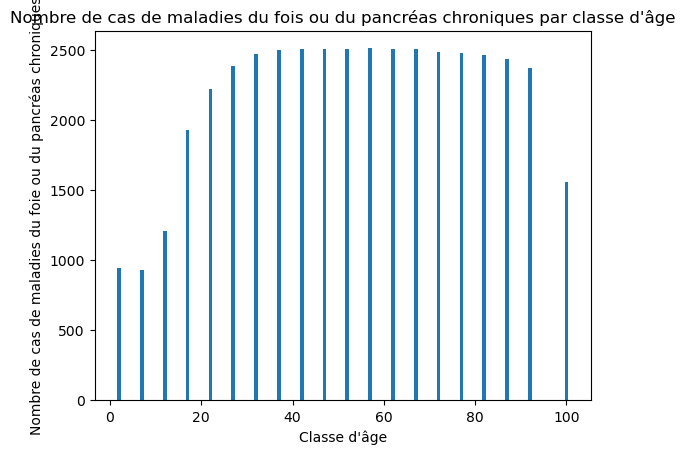

In [19]:
# Filtrez les lignes où la colonne 'indicatrice__Maladies_respiratoires_chroniques_(hors_mucoviscidose)' est égale à 1
T_filtered = model_foie_alpha[model_foie_alpha['indicatrice__Maladies_du_foie_ou_du_pancréas_(hors_mucoviscidose)'] == 1]

# Agrégation par âge pour compter le nombre d'individus
agg_data = T_filtered.groupby('classe_age').size().reset_index(name='nombre_de_cas')

# Créez un histogramme
plt.bar(agg_data['classe_age'], height=agg_data['nombre_de_cas'])

# Ajoutez des étiquettes et un titre
plt.xlabel('Classe d\'âge')
plt.ylabel('Nombre de cas de maladies du foie ou du pancréas chroniques')
plt.title('Nombre de cas de maladies du fois ou du pancréas chroniques par classe d\'âge')

# Affichez l'histogramme
plt.show()